Background: Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. They want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

This notebook will be to do basic manipulations, to visualize the data and to test whether the type of day (a work day or a weekend/holiday) has an affect on the count of bike rentals.

Source: https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data

**Column Profiling:**

datetime: datetime

season: season (1: spring, 2: summer, 3: fall, 4: winter)

holiday: whether day is a holiday or not

workingday: if day is neither weekend nor holiday is 1, otherwise is 0.

weather: 1: Clear, Few clouds, partly cloudy, partly cloudy 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

temp: temperature in Celsius

atemp: feeling temperature in Celsius

humidity: humidity

windspeed: wind speed

casual: count of casual users

registered: count of registered users

count: count of total rental bikes including both casual and registered

In [132]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import random
from datetime import datetime

In [2]:
#import data

df = pd.read_csv('yulu_bike_sharing_dataset.csv')

# EDA & Manipulations

In [3]:
#preview data
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
#double check for nulls
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [7]:
#create names for weather and season values to obtain more meaningful results

season_map = {1: "Spring", 
             2: "Summer",
             3: "Fall",
             4: "Winter"}

weather_map = {1: "Clear to Partly Cloudy",
               2: "Misty or Cloudy",
               3: "Light Snow or Rain",
               4: "Heavy Rain, Snow, Hail"}

#values obtained from Kaggle

In [8]:
df['season'] = df['season'].map(season_map)
df['weather'] = df['weather'].map(weather_map)

In [9]:
#check df
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,Spring,0,0,Clear to Partly Cloudy,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,Spring,0,0,Clear to Partly Cloudy,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,Spring,0,0,Clear to Partly Cloudy,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,Spring,0,0,Clear to Partly Cloudy,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,Spring,0,0,Clear to Partly Cloudy,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,Winter,0,1,Clear to Partly Cloudy,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,Winter,0,1,Clear to Partly Cloudy,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,Winter,0,1,Clear to Partly Cloudy,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,Winter,0,1,Clear to Partly Cloudy,13.94,17.425,61,6.0032,12,117,129


In [10]:
#change datetime to datetime type and extract date, time, and day of week

df['datetime'] = pd.to_datetime(df['datetime'])

In [11]:
df['date'] = df['datetime'].dt.date

In [12]:
df["time"] = df["datetime"].dt.time

In [13]:
df['day_name'] = df['datetime'].dt.day_name()

In [14]:
#split day into morning, afternoon, evening, and night

for i in df.index:
    if df.loc[i,'time'] < datetime.time(pd.to_datetime('6:00')):
        df.loc[i, 'time_of_day'] = 'Night'
    elif df.loc[i,'time'] < datetime.time(pd.to_datetime('12:00')):
        df.loc[i, 'time_of_day'] = 'Morning'
    elif df.loc[i,'time'] < datetime.time(pd.to_datetime('18:00')):
        df.loc[i, 'time_of_day'] = 'Afternoon'
    else: df.loc[i, 'time_of_day'] = 'Evening'

In [15]:
#preview df
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,time,day_name,time_of_day
0,2011-01-01 00:00:00,Spring,0,0,Clear to Partly Cloudy,9.84,14.395,81,0.0,3,13,16,2011-01-01,00:00:00,Saturday,Night
1,2011-01-01 01:00:00,Spring,0,0,Clear to Partly Cloudy,9.02,13.635,80,0.0,8,32,40,2011-01-01,01:00:00,Saturday,Night
2,2011-01-01 02:00:00,Spring,0,0,Clear to Partly Cloudy,9.02,13.635,80,0.0,5,27,32,2011-01-01,02:00:00,Saturday,Night
3,2011-01-01 03:00:00,Spring,0,0,Clear to Partly Cloudy,9.84,14.395,75,0.0,3,10,13,2011-01-01,03:00:00,Saturday,Night
4,2011-01-01 04:00:00,Spring,0,0,Clear to Partly Cloudy,9.84,14.395,75,0.0,0,1,1,2011-01-01,04:00:00,Saturday,Night


In [16]:
#add day of week

df['date'] = df['datetime'].dt.date

# Visualizations

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datetime     10886 non-null  datetime64[ns]
 1   season       10886 non-null  object        
 2   holiday      10886 non-null  int64         
 3   workingday   10886 non-null  int64         
 4   weather      10886 non-null  object        
 5   temp         10886 non-null  float64       
 6   atemp        10886 non-null  float64       
 7   humidity     10886 non-null  int64         
 8   windspeed    10886 non-null  float64       
 9   casual       10886 non-null  int64         
 10  registered   10886 non-null  int64         
 11  count        10886 non-null  int64         
 12  date         10886 non-null  object        
 13  time         10886 non-null  object        
 14  day_name     10886 non-null  object        
 15  time_of_day  10886 non-null  object        
dtypes: d

<Figure size 5000x2000 with 0 Axes>

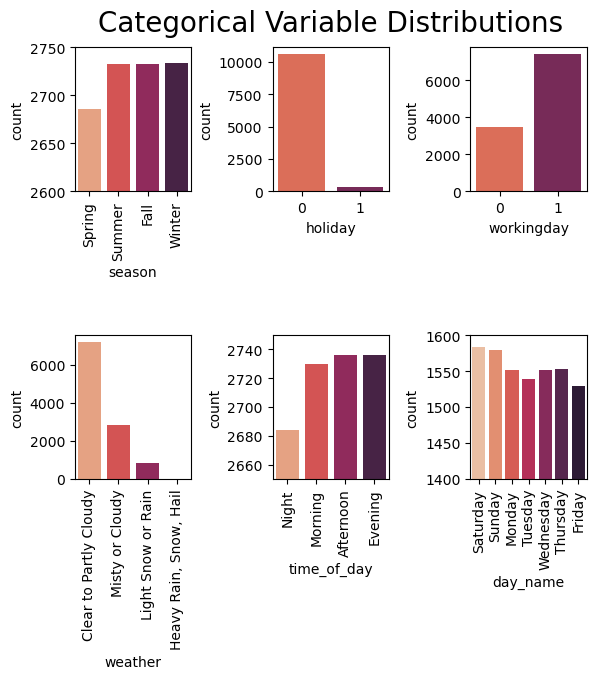

In [86]:
#look at distribution of categorical variables
# making subplots objects
plt.figure(figsize=(50,20))

fig, ax = plt.subplots(2, 3)

# draw graph
plt.subplot(2,3,1)
sns.countplot(x = df['season'],palette = "rocket_r")
plt.xticks(rotation = 90)
plt.ylim(2600, 2750)

plt.subplot(2,3,2)
sns.countplot(x = df['holiday'],palette = "rocket_r")

plt.subplot(2,3,3)
sns.countplot(x = df['workingday'],palette = "rocket_r")

plt.subplot(2,3,4)
sns.countplot(x = df['weather'],palette = "rocket_r")
plt.xticks(rotation = 90)

plt.subplot(2,3,5)
sns.countplot(x = df['time_of_day'],palette = "rocket_r")
plt.xticks(rotation = 90)
plt.ylim(2650, 2750)

plt.subplot(2,3,6)
sns.countplot(x = df['day_name'],palette = "rocket_r")
plt.xticks(rotation = 90)
plt.ylim(1400, 1600)

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.001, top=0.9, wspace=0.7, hspace=0.999)
 
fig.suptitle('Categorical Variable Distributions', fontsize=20)
 
plt.show()

<Figure size 1500x2000 with 0 Axes>

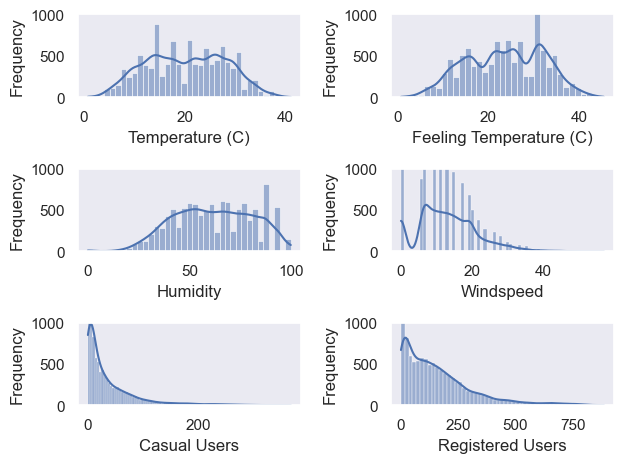

In [130]:
#Look at histograms of continuous variables
#excluding count as it is a combination of casual and registered

# Setting the aesthetics for the plots
sns.set(style="dark")

# making subplots objects
plt.figure(figsize=(15,20))

fig, ax = plt.subplots(3, 2)

ax1 = plt.subplot(3,2,1)
sns.histplot(df['temp'],
            kde = True)
ax1.set_xlabel("Temperature (C)")
plt.ylabel('Frequency')
plt.ylim(0, 1000)

ax2 = plt.subplot(3,2,2)
sns.histplot(df['atemp'],
            kde = True)
ax2.set_xlabel("Feeling Temperature (C)")
plt.ylabel('Frequency')
plt.ylim(0, 1000)

ax3 = plt.subplot(3,2,3)
sns.histplot(df['humidity'],
            kde = True)
ax3.set_xlabel("Humidity")
plt.ylabel('Frequency')
plt.ylim(0, 1000)

ax4 = plt.subplot(3,2,4)
sns.histplot(df['windspeed'],
            kde = True)
ax4.set_xlabel("Windspeed")
plt.ylabel('Frequency')
plt.ylim(0, 1000)

ax5 = plt.subplot(3,2,5)
sns.histplot(df['casual'],
            kde = True)
ax5.set_xlabel("Casual Users")
plt.ylabel('Frequency')
plt.ylim(0, 1000)

ax6 = plt.subplot(3,2,6)
sns.histplot(df['registered'],
            kde = True)
ax6.set_xlabel("Registered Users")
plt.ylabel('Frequency')
plt.ylim(0, 1000)

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.001, top=0.9, wspace=0.7, hspace=0.999)

plt.tight_layout()

plt.show()

In [43]:
#get daily count of rentals

daily_count = df.groupby(['season','date','day_name'])['count'].sum().reset_index()

In [52]:
daily_count.head()

,season,date,day_name,count
0,Fall,2011-07-01,Friday,5362
1,Fall,2011-07-02,Saturday,5119
2,Fall,2011-07-03,Sunday,4649
3,Fall,2011-07-04,Monday,6043
4,Fall,2011-07-05,Tuesday,4665


In [51]:
#visualize average rentals per week day

day_plot = daily_count.groupby('day_name')['count'].mean().reset_index()

day_plot

,day_name,count
0,Friday,4726.625000
1,Monday,4543.015385
2,Saturday,4719.969697
3,Sunday,4326.454545
4,Thursday,4713.861538
5,Tuesday,4492.076923
6,Wednesday,4495.784615


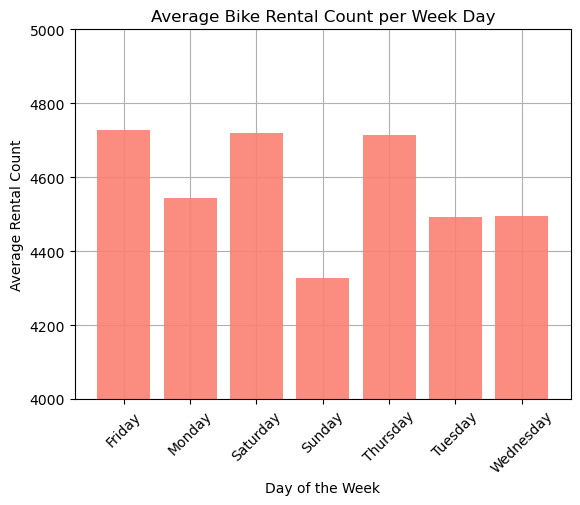

In [74]:
plt.figure()

plt.bar(day_plot['day_name'], day_plot['count'],
       zorder = 2,
       color = 'salmon',
       alpha = .9)
plt.xticks(rotation = 45)
plt.xlabel('Day of the Week')
plt.ylabel('Average Rental Count')
plt.title('Average Bike Rental Count per Week Day')
plt.ylim(4000, 5000)
plt.grid(zorder = 0)

plt.show()

# Hypothesis Test

Null Hypothesis: The type of day does not have an affect on the average number of bike rentals.

Alternative Hypothesis: The type of day has an affect on the average number of bike rentals. 

$H_0: \mu_1 = \mu_2 \\
H_a: \mu_1 \neq \mu_2\\ 
\alpha = .05$ 

Where $\mu_1$ = the average number of bike rentals on a work day and $\mu_2$ = the average number of bike rentals on all other days.


In [139]:
# Separate the counts based on working day
working_day_count = df[df['workingday'] == 1]['count']
non_working_day_count = df[df['workingday'] == 0]['count']

# Perform 2-sample t-test
t_stat, p_value = stats.ttest_ind(working_day_count, non_working_day_count)

t_stat, p_value

(1.2096277376026694, 0.22644804226361348)

Since ~.22 is greater than .05 we fail to reject the null hyptothesis. Let's check the size of each population to see if they are relatively equal. 

In [142]:
len(working_day_count)

7412

In [141]:
len(non_working_day_count)

3474

Given that we have more observations of work day data, we will sample a smaller proportion of that data for the hypothesis test

In [148]:
wd_count_sampled = working_day_count.sample(3474)

In [149]:
wd_count_sampled

476      40
74       36
5301     51
6348    525
5866    127
       ... 
7442    201
4468     21
7963      4
6480    108
5681     29
Name: count, Length: 3474, dtype: int64

In [150]:
# Perform 2-sample t-test
t_stat, p_value = stats.ttest_ind(wd_count_sampled, non_working_day_count)

t_stat, p_value

(1.3003966774647733, 0.19350819213289916)

The P_value is a little lower but we still fail to reject the null hypothesis. 

Based on the weekday graph above, it appears Saturday and Sunday have similar daily average counts. Let's see if bike rentals between weekend daya are significantly different. 

In [155]:
# Separate the counts between Friday and Saturday

Sunday_count = df[df['day_name'] == 'Sunday']['count']
Saturday_count = df[df['day_name'] == 'Saturday']['count']

# Perform 2-sample t-test
t_stat, p_value = stats.ttest_ind(Sunday_count, Saturday_count)

t_stat, p_value

(-2.555832436914327, 0.010639802241352816)

The p_value between Saturday and Sunday counts is ~.01 which is less than .05 which means we can reject the null hypothesis. From a business viewpoint, the next thing would be to consider why the count of bike rentals is different on Saturday and Sunday and then examine how we might market the bikes differently on these different days. 